In [23]:
import mnist
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPooling2D,Flatten , Conv1D , MaxPooling1D
import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split
import numpy as np
import cv2 , os
%matplotlib widget

In [24]:
def show_image(img):
    plt.close()
    plt.imshow(img)
    plt.show

In [25]:
model = Sequential()
model.add(Conv2D(10, kernel_size=(3,3) , activation="relu" , input_shape=(20 ,10 , 1)))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(30 , activation="relu"))
model.add(Dense(10))
model.compile(optimizer="adam" , loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics=["accuracy"])

In [26]:
model.load_weights("ocr.h5")

In [27]:
test_img5 = cv2.imread("5test.png")
test_img5 = cv2.cvtColor(test_img5, cv2.COLOR_BGR2GRAY)
test_img5 = test_img5 / 255
test_img5 = np.expand_dims(test_img5, axis=0)  # افزودن بعد برای batch size
test_img5 = np.expand_dims(test_img5, axis=-1) 



result_test = model.predict(test_img5)


wheres = 0
maxe = result_test[0].max()
for i in result_test[0]:
    if i != maxe:
        wheres += 1
    else:
        
        print("Predicted Number : " , wheres)


1/1 [==============================] - 0s 37ms/step
Predicted Number :  5


In [28]:
phonenumber = cv2.imread("phonenumber.png")
phonenumber_inverted = cv2.bitwise_not(phonenumber)
#phonenumber = np.resize(phonenumber , (20 , 10))
#phonenumber = cv2.cvtColor(phonenumber, cv2.COLOR_BGR2GRAY)
#phonenumber = phonenumber / 255
s = 90 - (np.sum(phonenumber_inverted , axis=0 , keepdims=True) / 255)

ok
1/1 [==============================] - 0s 12ms/step
ok
1/1 [==============================] - 0s 6ms/step
ok
1/1 [==============================] - 0s 14ms/step
ok
1/1 [==============================] - 0s 8ms/step
ok
1/1 [==============================] - 0s 8ms/step
ok
1/1 [==============================] - 0s 11ms/step
ok
1/1 [==============================] - 0s 4ms/step
ok
1/1 [==============================] - 0s 13ms/step
ok
1/1 [==============================] - 0s 14ms/step
ok
1/1 [==============================] - 0s 13ms/step
ok
1/1 [==============================] - 0s 12ms/step


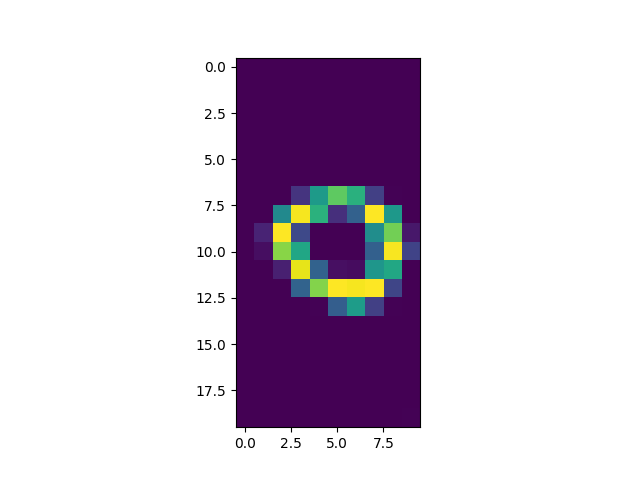

In [29]:
pelak = phonenumber_inverted.copy()
xi = 0
flag1 = False
flag2 = False
xi1 = 0
xi2 = 0
img_array = []
show = True
result = []
wheres = 0
for i in s[0]:
    xi += 1
    if np.all(i > 45) and np.all(i < 90) and flag1 == True and flag2 == False:
        flag2 = True
    if np.all(i < 43): 
        pelak = cv2.line(pelak, (xi, 0), (xi, 90), (0, 0, 255), 1)
        if flag1 == False:
            xi1 = xi

        if flag2 == True:
            xi2 = xi
            flag2 = False
            croped = phonenumber[:,xi1 : xi2]
            cv2.imshow("photo", croped)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
            x1 = np.empty((0 , 1000))
            test_resize = cv2.resize(croped , (10 , 20))
            test_2gray = cv2.cvtColor(test_resize , cv2.COLOR_BGR2GRAY)
            test_2gray = test_2gray / 255
            if show == True:
                show_image(test_2gray)
                zero_test = test_2gray.copy()
                show = False
            else:
                pass
            print("ok")
            test_2gray = np.expand_dims(test_2gray, axis=0) 
            test_2gray = np.expand_dims(test_2gray, axis=-1) 
            custome_test = model.predict(test_2gray)
            result.append(custome_test[0])


            xi1 = xi2
        flag1 = True
    

cv2.imshow("photo", pelak)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
numbers = ""
for i in result:
    wheres = 0
    maxe = i.max()
    for g in i:
        if g != maxe:
            wheres += 1
        else:
            numbers = numbers+f"{wheres}"
            print("Predicted Number :" , wheres)

Predicted Number : 4
Predicted Number : 2
Predicted Number : 3
Predicted Number : 6
Predicted Number : 4
Predicted Number : 8
Predicted Number : 7
Predicted Number : 7
Predicted Number : 7
Predicted Number : 3
Predicted Number : 3


In [31]:
numbers

'42364877733'